In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt 

# Setup

The [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) models the number of successes in $m$ Bernoulli trials (e.g., coin flips), each with success probability $p$. The PMF is as follows: 

$f(y_i) = \frac{m!}{y_i!(m-y_i)!} p^{y_i} (1-p)^{m-y_i}$ where $y_i \in \{0, 1, ..., m\}$

This distribution has both $m$ and $p$ as parameters. Here we will treat $m$ as known, and rather than estimating $p$ directly, we will first apply the logistic transformation $p = \frac{\exp(\beta)}{1+\exp(\beta)}$ to obtain the following likelihood:

$$f(y_i|\beta) = \frac{m!}{y_i!(m-y_i)!} \left(\frac{\exp(\beta)}{1+\exp(\beta)}\right)^{y_i} \left(1-\frac{\exp(\beta)}{1+\exp(\beta)} \right)^{m-y_i}$$

Our goal will be to use MLE to solve for $\hat\beta$.

# Part 1 [12 pts]

* Find and simplify the joint log-likelihood function $\log \mathcal L(\beta;\mathbf y)$.

* Compute the score function $s(\beta)$, and use it to find the MLE $\hat\beta$ in terms of known values.

* What is the value of $\hat p$ corresponding to the value of $\hat \beta$ that you found? As a hint, simply apply the logistic transformation. Give a brief explanation for the value of $\hat p$ in terms of the data and model.

### 1. To find and simplify $ \log L(\beta; y) $, we have:

The likelihood is given by:

$L(\beta; y) = \prod_{i=1}^{n} f(y_i | \beta)$

Taking the logarithm, we have:

$log L(\beta; y) = \log \left( \prod_{i} f(y_i | \beta) \right) = \sum_i \log(f(y_i | \beta))$

Substitute the binomial distribution form:

$log L(\beta; y) = \sum_i \left[ \log \frac{m!}{y_i!(m - y_i)!} + y_i \log \frac{\exp(\beta)}{1 + \exp(\beta)} + (m - y_i) \log \left( 1 - \frac{\exp(\beta)}{1 + \exp(\beta)} \right) \right]$

Since we are given $ p = \frac{\exp(\beta)}{1 + \exp(\beta)} $, we have:

$log L(\beta; y) = \sum_i \left[ \log \frac{m!}{y_i!(m - y_i)!} + y_i \log p + (m - y_i) \log(1 - p) \right]$

Thus, we get:

$log L(\beta; y) = \sum_i \left[ y_i \log p + (m - y_i) \log(1 - p) \right]$

### 2. For the score function $ S(\beta) $ and MLE $ \hat{\beta} $, we have

$
S(\beta) = \frac{\partial \log L}{\partial \beta} \quad \Rightarrow \quad S(\beta) = \frac{\partial}{\partial \beta} \sum_i \left[ y_i \log p + (m - y_i) \log(1 - p) \right]
$

$
S(\beta) = \frac{\partial}{\partial \beta} \sum_i \left[ y_i \log p + (m - y_i) \log(1 - p) \right]
$

As $ p = \frac{\exp(\beta)}{1 + \exp(\beta)} $, we have:

$
\frac{\partial p}{\partial \beta} = p(1 - p)
$

Then we have:

$
S(\beta) = \sum_i \left( \frac{y_i}{p} \cdot p(1 - p) - \frac{m - y_i}{1 - p} \cdot p(1 - p) \right)
$

$
= \sum_i \left[ y_i (1 - p) - (m - y_i) p \right]
$

For the MLE $ \hat{\beta} $, we have $ S(\hat{\beta}) = 0 $. Solving this, we get:

$
\sum_i \left[ y_i (1 - p) - (m - y_i) p \right] = 0 \quad \Rightarrow \quad \sum_i y_i = n m p
$

Thus, we have:

$
p = \frac{\sum_{i=1}^{n} y_i}{n m}
$

### 3. As $ p = \frac{\exp(\beta)}{1 + \exp(\beta)}$, we have:

$\hat{\beta} = \log \frac{p}{1 - p}$

$\hat{\beta} = \log \frac{\sum_{i=1}^{n} y_i}{n m - \sum_{i=1}^{n} y_i}$

Thus, $ p = \frac{\sum_{i=1}^{n} y_i}{n m}$.


# Part 2 [12 pts]

* Find an expression for the Hessian $H(\beta)$ at $\hat\beta$ in terms of known quantities, and use it show that $\hat\beta$ is a local maximum.

* Find an expression for $\hat{Var}(\hat\beta)$ the sample estimate of the variance $\hat\beta$.

* Briefly explain why $\hat{Var}(\hat\beta)$ varies inversely with each of $m$ and $n$. How does it vary with $\hat\beta$?

### 1. From lecture notes, we have

$H(\beta) = \frac{\partial^2 \log L(\beta; y)}{\partial \beta^2}$

$= \frac{\partial}{\partial \beta} \left( \frac{\partial \log L(\beta; y)}{\partial \beta} \right)$

$= \frac{\partial}{\partial \beta} \left( S(\beta) \right)$

$= \sum_i \frac{\partial}{\partial \beta} \left[ y_i (1 - p(\beta)) - (m - y_i) p(\beta) \right]$

$= \sum_i \left[ -y_i \frac{\partial p(\beta)}{\partial \beta} - (m - y_i) \frac{\partial p(\beta)}{\partial \beta} \right]$

$= \sum_i \left[ -y_i p(\beta)(1 - p(\beta)) - (m - y_i) p(\beta)(1 - p(\beta)) \right]$

Thus, we have:

$H(\beta) = -n m p(\beta)(1 - p(\beta)) \quad \text{as} \quad \frac{\partial p}{\partial \beta} = p(1 - p)$

Since $ H(\hat{\beta}) < 0$, we have $ \hat{\beta}$ as a local maximum.

### 2. From lecture notes, we have

$\text{Var}(\hat{\beta}) \approx -H(\hat{\beta})^{-1}$

Thus, we have:

$\text{Var}(\hat{\beta}) = \frac{1}{n m p(\hat{\beta})(1 - p(\hat{\beta}))}$


### 3. 
Because $ \text{Var}(\hat{\beta})$ represents uncertainty, as $ n$, the number of Bernoulli trials, and $ m$, the number of outcomes, increase, we get more information and become more certain. Thus, the uncertainty decreases, and $ \text{Var}(\hat{\beta})$ decreases.

Also, as different $ p(\beta)$ give different $ \hat{\beta}$, we have $ \text{Var}(\hat{\beta})$ vary for different $ p(\beta)$. $ \text{Var}(\hat{\beta})$ decreases as $ p(\beta)$ approaches 0 or 1 (meaning more certain).

# Part 3 [12 pts]

* Let $m = 100$ and $n = 100$. Write a loop over values of $p$ ranging from $0.01$ to $0.99$, at intervals of $0.01$, that does the following:

* Generate $n$ samples using `np.random.binomial(m,p,n)`.

* Using the generated samples, compute $\hat\beta$, $\hat p$, $H(\hat\beta)$, and $\hat{Var}(\hat\beta)$. Store the last quantity, e.g., in a list.

* When finished, show a simple plot of $\hat{Var}(\hat\beta)$ over the the values of $p$.

In [6]:
m = 100
n = 100
p_val = np.arange(0.01, 0.99, 0.01)

for p in p_val:
    y = np.random.binomial(m, p, n)
y

array([ 99,  99, 100,  97,  99,  98,  97,  99,  95,  99, 100,  98,  96,
        98,  99,  99,  98,  95,  99,  98,  96,  98, 100,  98,  97, 100,
       100,  96,  98, 100,  98,  99,  96,  99,  97,  98,  99,  99,  99,
        95, 100,  96, 100,  98,  96,  98,  99,  99,  97,  99,  98,  99,
        98,  99,  97,  98,  97, 100,  99,  99,  98,  99,  99,  96,  99,
        99,  99,  98,  99,  97,  97,  98,  97,  97,  98,  98,  97, 100,
        99,  98,  99,  96,  97,  99,  96,  99,  98,  99,  97,  96,  98,
        98,  99,  98,  99,  98, 100, 100,  99,  97])

In [7]:
beta_hat = np.log(np.sum(y) / (m * n - np.sum(y)))
beta_hat

3.9658185429366477

In [8]:
p_hat = np.sum(y) / (m * n)
p_hat

0.9814

In [9]:
p_beta = np.exp(beta_hat) / (1 + np.exp(beta_hat))
p_beta

0.9814

In [10]:
H_beta = - m * p_hat * (1-p_hat)
H_beta

-1.8254039999999951

In [11]:
Var_beta = - (1 / H_beta)
Var_beta

0.5478239337702792

In [73]:
var_beta_val = []
i = 0
for p in p_val:
    y_now = np.random.binomial(m, p, n)
    p_hat_now = np.mean(y_now) / m
    beta_hat_now = np.log(p_hat_now  / (1 - p_hat_now))
    H = - n * m * p_hat_now * (1-p_hat_now)
    var_b = - 1 / H
    var_beta_val.append(var_b)

print(beta_hat_now, p_hat_now, H, var_b)

3.789829806794527 0.9779000000000001 -216.11589999999904 0.0046271468226077046


<function matplotlib.pyplot.show(close=None, block=None)>

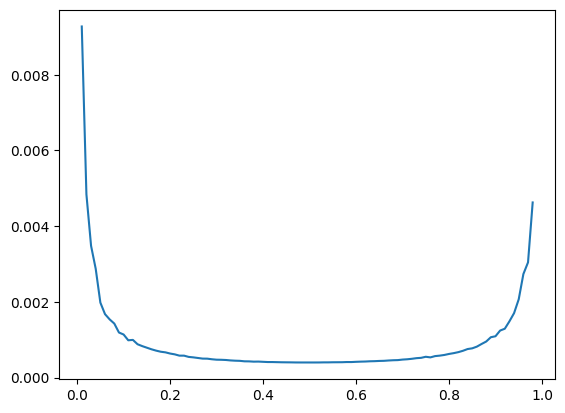

In [74]:
plt.plot(p_val, var_beta_val)
plt.show

# Part 4 [12 pts]

Implement Newton's method to numerically find the MLE for $\hat\beta$, with the data generated below. Use $0$ as the initial guess, and stop when the log-likelihood changes by less than $10^{-8}$ in a given iteration. Show a simple plot of the log-likelihood over each iteration when done.

You are strongly recommended to use the code template from class.

In [67]:
y = np.random.binomial(100, 0.99, 100)

In [55]:
import scipy.stats as spst  


In [65]:
def loglikelihood(beta, y, m):
    p = np.exp(beta) / (1 + np.exp(beta))
    return np.sum(spst.binom.logpmf(y, m, p))
    #y * np.log(p) + (m - y) * np.log(1 - p))

def newton(y, m, beta, thresh):
    n = len(y)
    LLs = [loglikelihood(beta, y, m)]
    while True:
        #print(beta)
        p = np.exp(beta) / (1 + np.exp(beta))
        grad = np.sum(y) - n * m * p
        #print("grad", grad)

        hess = - n * m * p * (1 - p)
        #print("hess", hess, "p", p)
        beta = beta - grad/hess
        #print("update beta", beta)
        new = loglikelihood(beta, y, m)
        LLs.append(new)
        if abs(new - LLs[-2]) < thresh:
            return beta, LLs


In [68]:
beta, LLs = newton(y, 100, 0, 1e-8)

In [69]:
print(beta, "\n")
print(LLs)

4.820281565604949 

[-6579.487808483377, -1113.4229994518514, -360.98312287031786, -160.53229524504772, -118.24999492846041, -114.03535151795678, -113.96027760055685, -113.96024510497678, -113.96024510497034]


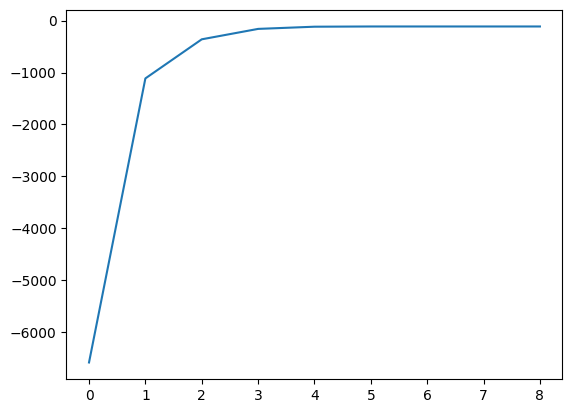

In [70]:
plt.plot(LLs)
plt.show()